In [2]:
import iminuit
from iminuit import Minuit
import numpy as np

In [10]:
def sumn(n):
    return np.sum( np.log(np.arange(n)+1) )

def multinomial(n):
    sum_term = sumn(np.sum(n)) - sumn(n[0]) - sumn(n[1]) - sumn(n[2])
    return lambda r, p2 : -2 * (sum_term + n[0]*np.log(1-p2/r) + (n[1]+n[2])*np.log(p2) + n[1]*np.log(1-r) - n[1]*np.log(r))

In [4]:
n = (719, 174, 223)
#multinomial(n, 0.2, 0.55)

In [11]:
m = Minuit(multinomial(n), p2=0.2, r=0.5)

In [12]:
m.migrad()

/home/theo/anaconda3/envs/keras-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  """Entry point for launching an IPython kernel.


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 13.8                       │              Nfcn = 43               │
│ EDM = 1.87e-11 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ r    │   0.562   │   0.025   │            │            │         │         │       │
│ 1 │ p2   │   0.200   │   0.012   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬───────────────────┐
│    │        r       p2 │
├────┼───────────────────┤
│  r │  0.00062 0.000221 │
│ p2 │ 0.000221 0.000143 │
└────┴───────────────────┘

In [13]:
m.minos()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 13.8                       │              Nfcn = 101              │
│ EDM = 1.87e-11 (Goal: 0.0002)    │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ r    │   0.562   │   0.025   │   -0.025   │   0.025    │         │         │       │
│ 1 │ p2   │   0.200   │   0.012   │   -0.012   │   0.012    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           r           │          p2           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.025   │   0.025   │  -0.012   │   0.012   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌────┬───────────────────┐
│    │        r       p2 │
├────┼───────────────────┤
│  r │  0.00062 0.000221 │
│ p2 │ 0.000221 0.000143 │
└────┴───────────────────┘

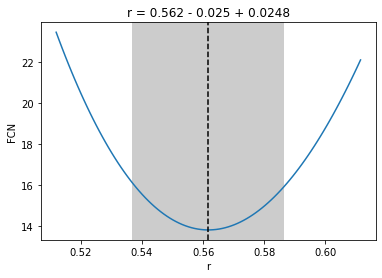

In [7]:
m.draw_profile("r");

In [36]:
repr(m.params[1])

"Param(number=1, name='r', value=0.5, error=0.025395325139307555, merror=None, is_const=False, is_fixed=False, has_limits=False, has_lower_limit=False, has_upper_limit=False, lower_limit=None, upper_limit=None)"

In [25]:
for p in m.params:
    print(repr(p), "\n")

Param(number=0, name='p2', value=0.2, error=0.013567255997957245, merror=None, is_const=False, is_fixed=False, has_limits=False, has_lower_limit=False, has_upper_limit=False, lower_limit=None, upper_limit=None) 

Param(number=1, name='r', value=0.5, error=0.025395325139307555, merror=None, is_const=False, is_fixed=False, has_limits=False, has_lower_limit=False, has_upper_limit=False, lower_limit=None, upper_limit=None) 



In [51]:
m.values['r']

0.5617127388001834

In [52]:
m.errors['r']

0.024901043809066863